In [1]:
import pandas as pd

In [11]:
product_attributes= pd.read_excel('/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Product Attributes.xlsx', sheet_name='Rfg_and_Fz_Meat_and_Substitute')
import pandas as pd
yearly_sales_files = [
    '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Fz_Rfg Substitute Meat_POS_2020.xlsx',
    '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Fz_Rfg Substitute Meat_POS_2021.xlsx',
    '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Fz_Rfg Substitute Meat_POS_2022.xlsx',
    '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Fz_Rfg Substitute Meat_POS_2023.xlsx',
    '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/Fz_Rfg Substitute Meat_POS_2024.xlsx']

# Step 2: Combine all yearly sales data into a single DataFrame
sales_data = pd.concat([pd.read_excel(file) for file in yearly_sales_files], ignore_index=True)

# Step 3: Data Cleaning
product_attributes['UPC 13 digit'] = product_attributes['UPC 13 digit'].astype(str).str.zfill(13)
sales_data['UPC 13 digit'] = sales_data['UPC 13 digit'].astype(str).str.zfill(13)
# Step 4: Merge product attributes with sales data
merged_data = pd.merge(sales_data, product_attributes, on='UPC 13 digit', how='left')
merged_data.to_csv('prepared_data.csv', index=False)
print("Data preparation complete. The prepared data is saved as 'prepared_data.csv'.")

# Step 5.1: Drop columns with more than 90% missing values
threshold = 0.9
missing_ratio = merged_data.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > threshold].index

merged_data = merged_data.drop(columns=columns_to_drop)

print(f"Dropped columns with >90% missing values: {list(columns_to_drop)}")

Data preparation complete. The prepared data is saved as 'prepared_data.csv'.
Dropped columns with >90% missing values: ['Unit Sales Special Pack Only', 'Unit Sales Feature and Display', 'Volume Sales Special Pack Only', 'Volume Sales Feature and Display', 'Dollar Sales Special Pack Only', 'Dollar Sales Feature and Display', 'Price per Unit Special Pack Only', 'Price per Unit Feature and Display', 'Price per Volume Special Pack Only', 'Price per Volume Feature and Display', 'ACV Weighted Distribution Special Pack Only', 'ACV Weighted Distribution Feature and Display', 'Meat Source']


In [13]:
# Count numerical columns (int or float)
numerical_cols = merged_data.select_dtypes(include=['number']).columns
num_numerical = len(numerical_cols)
# Count categorical columns (object or category type)
categorical_cols = merged_data.select_dtypes(include=['object', 'category']).columns
num_categorical = len(categorical_cols)
print(f"Number of numerical columns: {num_numerical}")
print(f"Number of categorical columns: {num_categorical}")

Number of numerical columns: 44
Number of categorical columns: 18


In [21]:
print("'Time' column converted to datetime format.")
print(merged_data['Time'].head())

# Define the list of manufacturer names to keep
main_manufacturers = [
    'CONAGRA BRANDS',
    'BEYOND MEAT INC',
    'KELLANOVA',
    'IMPOSSIBLE FOODS INC'
]
filtered_data = merged_data.copy()

# Replace all manufacturers not in the main list with 'Rest_ALL'
filtered_data['Manufacturer Name'] = filtered_data['Manufacturer Name'].apply(
    lambda x: x if x in main_manufacturers else 'Rest_ALL'
)

print(f"Grouped data now contains {filtered_data.shape[0]} rows.")
print(filtered_data['Manufacturer Name'].value_counts())

# Save the filtered data
filtered_path = '/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/filtered_manufacturers_data.csv'
filtered_data.to_csv(filtered_path, index=False)


'Time' column converted to datetime format.
0   2020-01-12
1   2020-01-19
2   2020-01-26
3   2020-02-02
4   2020-02-09
Name: Time, dtype: datetime64[ns]
Grouped data now contains 167413 rows.
Manufacturer Name
Rest_ALL                137107
KELLANOVA                14120
CONAGRA BRANDS            9765
BEYOND MEAT INC           3963
IMPOSSIBLE FOODS INC      2458
Name: count, dtype: int64


In [23]:
data = pd.read_csv("/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/filtered_manufacturers_data.csv")

In [25]:
def simplify_form(x):
    x = str(x).strip().upper()
    if any(term in x for term in ['BURGER', 'PATTY', 'SLIDER']):
        return 'BURGER/PATTY'
    elif any(term in x for term in ['NUGGET', 'TENDER', 'STRIP', 'FUN NUGGETS', 'POPCORN', 'FINGER', 'FRIES']):
        return 'NUGGET/TENDER/STRIP'
    elif any(term in x for term in ['GROUND', 'CRUMBLE', 'PULLED', 'SHREDDED', 'SHREDS']):
        return 'GROUND/CRUMBLE'
    elif any(term in x for term in ['SAUSAGE', 'BRATWURST', 'LINK', 'DINNER SAUSAGE', 'BREAKFAST SAUSAGE']):
        return 'SAUSAGE/LINK'
    elif any(term in x for term in ['HOT DOG', 'FRANK']):
        return 'HOT DOG'
    elif any(term in x for term in ['MEATBALL']):
        return 'MEATBALL'
    elif any(term in x for term in ['STEAK', 'FILET', 'CUTLET', 'ROAST']):
        return 'STEAK/CUT/ROAST'
    elif 'BLOCK' in x or 'CUBE' in x or 'LOAF' in x:
        return 'BLOCK/CUBE/LOAF'
    else:
        return 'OTHER'

data['Form Grouped'] = data['Form'].apply(simplify_form)

def simplify_flavor(x):
    x = str(x).strip().upper()
    if any(term in x for term in ['SPICY', 'CHIPOTLE', 'HOT', 'HABANERO', 'SRIRACHA']):
        return 'SPICY'
    elif any(term in x for term in ['BBQ', 'BARBEQUE', 'GRILLED', 'KOREAN BARBEQUE']):
        return 'BBQ'
    elif any(term in x for term in ['GARLIC', 'HERB', 'BASIL', 'OREGANO', 'ITALIAN']):
        return 'HERB/GARLIC'
    elif any(term in x for term in ['CURRY', 'MASALA', 'TANDOORI', 'INDIAN', 'BOMBAY', 'MADRAS']):
        return 'CURRY/EXOTIC'
    elif any(term in x for term in ['SMOKE', 'SMOKY', 'APPLEWOOD', 'HICKORY']):
        return 'SMOKY'
    elif 'SWEET' in x:
        return 'SWEET'
    elif any(term in x for term in ['PLAIN', 'ORIGINAL', 'REGULAR', 'CLASSIC', 'BASIC']):
        return 'PLAIN/ORIGINAL'
    else:
        return 'OTHER'

data['Flavor Grouped'] = data['Flavor / Scent'].apply(simplify_flavor)


def simplify_package(x):
    x = str(x).strip().upper()
    if 'BOX' in x or 'CARTON' in x:
        return 'BOXED'
    elif 'BAG' in x or 'POUCH' in x or 'PEG' in x:
        return 'BAGGED'
    elif 'VACUUM' in x:
        return 'VACUUM PACKED'
    elif 'WRAP' in x or 'WRAPPED' in x:
        return 'WRAPPED'
    elif 'TUB' in x or 'CONTAINER' in x:
        return 'TUB/CONTAINER'
    else:
        return 'OTHER'

data['Package Grouped'] = data['Package'].apply(simplify_package)

def simplify_product_type(x):
    x = str(x).strip().upper()
    if 'TOFU' in x:
        return 'TOFU'
    elif 'TEMPEH' in x:
        return 'TEMPEH'
    elif 'FALAFEL' in x:
        return 'FALAFEL'
    elif 'SEAFOOD' in x or 'FISH' in x:
        return 'SEAFOOD SUBSTITUTE'
    elif 'SOY' in x:
        return 'SOY'
    elif 'SEITAN' in x:
        return 'SEITAN'
    elif 'PLANT' in x or 'MEAT SUBSTITUTE' in x:
        return 'PLANT-BASED SUBSTITUTE'
    else:
        return 'OTHER'

data['Product Type Grouped'] = data['Product Type'].apply(simplify_product_type)


In [27]:
# SAFETY: Fill NaN ACV Weighted Distribution to avoid divide-by-zero errors
data['ACV Weighted Distribution'] = data['ACV Weighted Distribution'].fillna(0.01)

# Create Velocity: Unit Sales per ACV Weighted Distribution
data['Velocity'] = data['Unit Sales'] / data['ACV Weighted Distribution']

# SAFETY: Fill NaN Unit Sales to avoid divide-by-zero
data['Unit Sales'] = data['Unit Sales'].fillna(0.01)

# Create Incremental Sales %: (Incremental Units / Unit Sales) * 100
data['Incremental Sales %'] = (data['Incremental Units'] / data['Unit Sales']) * 100



Best alpha (regularization strength): 148.21731752705747

🔍 Non-zero feature coefficients (important predictors):
Package Grouped_TUB/CONTAINER                  1920.369378
ACV Weighted Distribution                      1360.502879
Flavor Grouped_PLAIN/ORIGINAL                   171.431680
Form Grouped_BURGER/PATTY                       109.427486
Product Type Grouped_PLANT-BASED SUBSTITUTE      66.389449
Price per Unit                                  -56.956651
Product Type Grouped_OTHER                     -241.306520
dtype: float64

Train R^2 score: 0.7378796471910207
Test R^2 score: 0.7797465136234955


/var/folders/bh/7z7rbz2n6pl19_6pb_g0hy3m0000gn/T/ipykernel_4089/4182863949.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_zero_coef.values, y=non_zero_coef.index, palette="viridis")


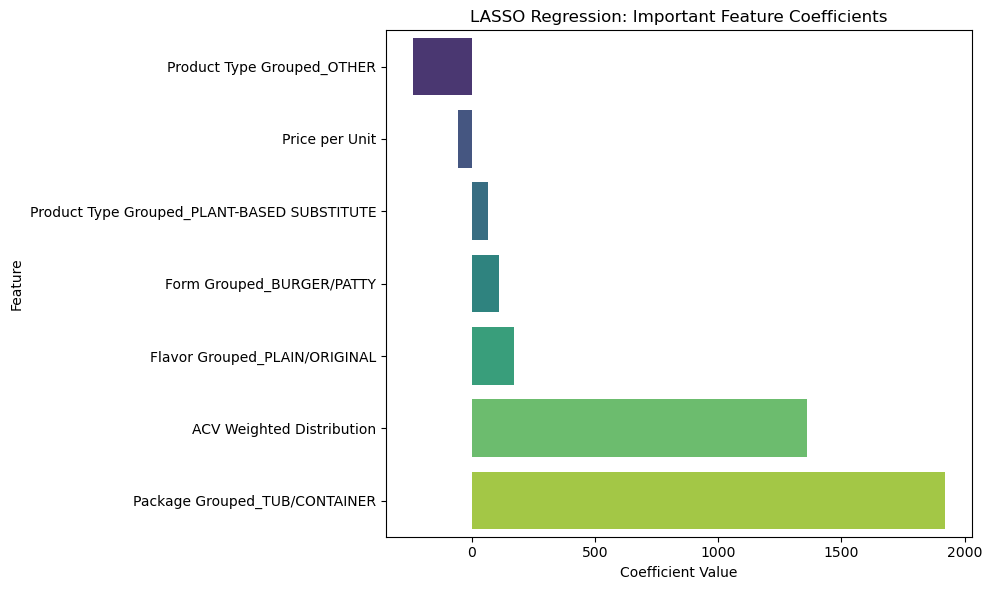

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

target = data['Unit Sales']
features = data[['Form Grouped', 'Flavor Grouped', 'Package Grouped',
                 'Product Type Grouped', 'Price per Unit', 'ACV Weighted Distribution']]
categorical_cols = ['Form Grouped', 'Flavor Grouped', 'Package Grouped', 'Product Type Grouped']
numeric_cols = ['Price per Unit', 'ACV Weighted Distribution']
X_categorical = features[categorical_cols]
X_numeric = features[numeric_cols]
# OneHot encode
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_categorical)

X_all = np.hstack([X_cat_encoded, X_numeric.values])
X_train, X_test, y_train, y_test = train_test_split(X_all, target, test_size=0.2, random_state=42)

# Fit LASSO with cross-validation to choose alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("\nBest alpha (regularization strength):", lasso.alpha_)

# Feature importance: non-zero coefficients
feature_names = encoder.get_feature_names_out(categorical_cols).tolist() + numeric_cols
coef = pd.Series(lasso.coef_, index=feature_names)

print("\n🔍 Non-zero feature coefficients (important predictors):")
print(coef[coef != 0].sort_values(ascending=False))

# Optional: Evaluate performance
print("\nTrain R^2 score:", lasso.score(X_train, y_train))
print("Test R^2 score:", lasso.score(X_test, y_test))


import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-zero coefficients
non_zero_coef = coef[coef != 0].sort_values()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=non_zero_coef.values, y=non_zero_coef.index, palette="viridis")
plt.title('LASSO Regression: Important Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Best alpha (regularization strength): 17.6016
Model R² score on full dataset: 0.9099
Top 15 Important Features (by LASSO Coefficients):
Form_GROUND                               16711.4845
ACV Weighted Distribution                 16664.9771
Flavor / Scent_NASHVILLE HOT             -7346.3155
Form_LINK                                -6442.9883
Flavor / Scent_TERIYAKI                  -4931.2765
Form_TENDER                               4565.8011
Flavor / Scent_CHICKEN                   -4436.8924
Form_MEATBALL                             3978.9987
Flavor / Scent_CHIPOTLE BLACK BEAN        3103.5480
Flavor / Scent_BEEF                      -3044.4847
Flavor / Scent_BREAKFAST SAUSAGE         -2659.6619
Flavor / Scent_BARBEQUE                  -2569.0200
Form_BURGER                              -2549.9399
Product Type_FISH SUBSTITUTE             -2286.5674
Flavor / Scent_SWEET & SOUR              -1903.8791


/var/folders/bh/7z7rbz2n6pl19_6pb_g0hy3m0000gn/T/ipykernel_4089/2073092883.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coef_df, palette='viridis')


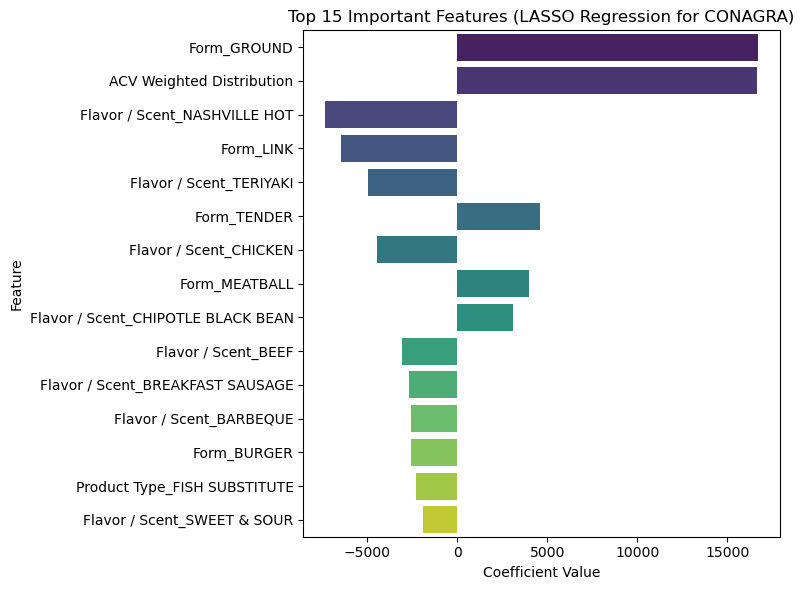

In [33]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/filtered_manufacturers_data.csv')
#Filter only CONAGRA rows
df_conagra = df[df['Manufacturer Name'].str.contains('CONAGRA BRANDS', case=False, na=False)]

# Define target & features
y = df_conagra['Unit Sales']
X = df_conagra[
    ['Price per Unit', 'ACV Weighted Distribution',
     'Package', 'Form', 'Flavor / Scent', 'Product Type']
]

# Drop any rows with missing values in X or y (to avoid errors)
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns='Unit Sales')
y = df_model['Unit Sales']

numeric_features = ['Price per Unit', 'ACV Weighted Distribution']
categorical_features = ['Package', 'Form', 'Flavor / Scent', 'Product Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Build pipeline: preprocessing + LASSO with cross-validation
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', LassoCV(cv=5, random_state=0))
])

# Fit the model
pipeline.fit(X, y)
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_names)

lasso_coef = pipeline.named_steps['lasso'].coef_
# Create DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lasso_coef
})

# Only keep non-zero coefficients
coef_df = coef_df[coef_df['Coefficient'] != 0]

# Sort by absolute value and take top 15
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
top_coef_df = coef_df.head(15)
# === Existing code assumed to be already executed above ===

# Print best alpha value chosen by LassoCV
print(f"Best alpha (regularization strength): {pipeline.named_steps['lasso'].alpha_:.4f}")

# Print R² score on the full dataset
r2_score = pipeline.score(X, y)
print(f"Model R² score on full dataset: {r2_score:.4f}")


# Filter non-zero coefficients
coef_df = coef_df[coef_df['Coefficient'] != 0]

# Sort by absolute value and get top 15
top_coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(15)

# Print top 15 important features
print("Top 15 Important Features (by LASSO Coefficients):")
for i, row in top_coef_df.iterrows():
    print(f"{row['Feature']:40s} {row['Coefficient']: .4f}")

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=top_coef_df, palette='viridis')
plt.title('Top 15 Important Features (LASSO Regression for CONAGRA)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [35]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

data['Time'] = pd.to_datetime(data['Time'])
# Extract month (1 to 12)
data['Month'] = data['Time'].dt.month

# Prepare output storage
monthly_results = {}

# Define features
categorical_cols = ['Form Grouped', 'Flavor Grouped', 'Package Grouped', 'Product Type Grouped']
numeric_cols = ['Price per Unit', 'ACV Weighted Distribution']

# Loop through each month (1 to 12)
for month in sorted(data['Month'].unique()):
    print(f"\n=== Month: {month} ===")
    month_data = data[data['Month'] == month]

    # Skip if too few samples
    if len(month_data) < 30:
        print(f"Not enough data points for Month {month}, skipping.")
        continue

    target = month_data['Unit Sales']
    features = month_data[categorical_cols + numeric_cols]

    # OneHot encode
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_cat_encoded = encoder.fit_transform(features[categorical_cols])
    X_all = np.hstack([X_cat_encoded, features[numeric_cols].values])

    # LASSO
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_all, target)

    feature_names = encoder.get_feature_names_out(categorical_cols).tolist() + numeric_cols
    coef = pd.Series(lasso.coef_, index=feature_names)

    print("Alpha:", lasso.alpha_)
    print("Non-zero features:\n", coef[coef != 0].sort_values(ascending=False))

    # Store results
    monthly_results[month] = coef[coef != 0]



=== Month: 1 ===
Alpha: 158.38921803332113
Non-zero features:
 ACV Weighted Distribution                      1356.436427
Package Grouped_TUB/CONTAINER                   904.439442
Flavor Grouped_PLAIN/ORIGINAL                   223.936847
Product Type Grouped_PLANT-BASED SUBSTITUTE     110.201540
Price per Unit                                  -92.329976
Product Type Grouped_OTHER                     -297.521607
dtype: float64

=== Month: 2 ===
Alpha: 148.1104112858538
Non-zero features:
 ACV Weighted Distribution                      1292.576556
Package Grouped_TUB/CONTAINER                  1104.380438
Product Type Grouped_PLANT-BASED SUBSTITUTE     154.181708
Flavor Grouped_PLAIN/ORIGINAL                   124.736221
Price per Unit                                  -32.068598
Product Type Grouped_OTHER                     -292.209898
dtype: float64

=== Month: 3 ===
Alpha: 172.0061277380222
Non-zero features:
 ACV Weighted Distribution                      1463.968222
Package Group

In [39]:
import pandas as pd

# Read in chunks to filter only Gardein rows
chunks = pd.read_csv('/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/filtered_manufacturers_data.csv', chunksize=100_000)
gardein_rows = [chunk[chunk['Brand Franchise Name'].str.contains('GARDEIN', na=False, case=False)] for chunk in chunks]
gardein_data = pd.concat(gardein_rows)
gardein_data.to_csv('gardein_filtered.csv', index=False)


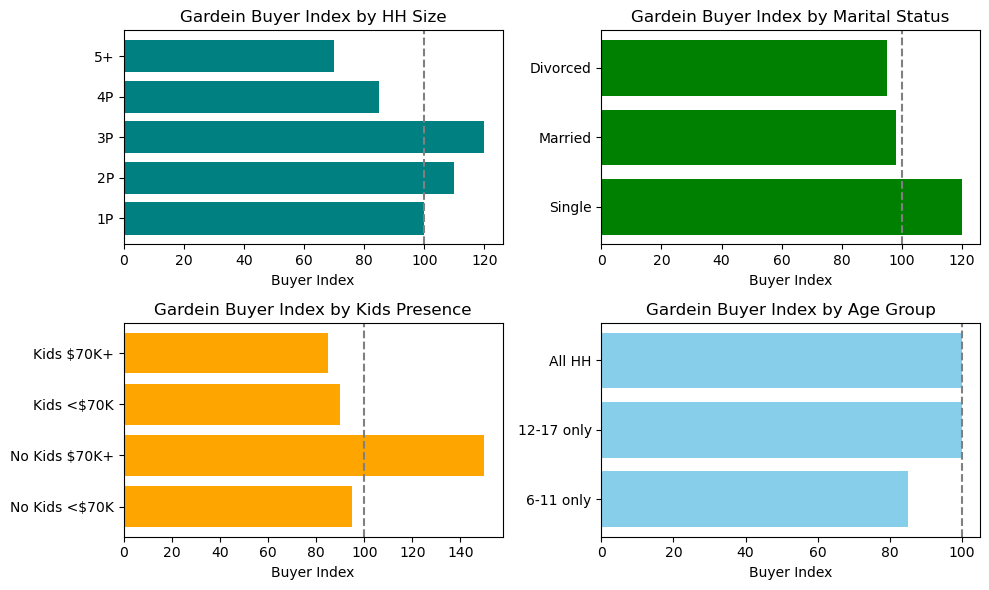

In [41]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
hh_size_labels = ['1P', '2P', '3P', '4P', '5+']
hh_size_values = [100, 110, 120, 85, 70]

marital_labels = ['Single', 'Married', 'Divorced']
marital_values = [120, 98, 95]

kids_labels = ['No Kids <$70K', 'No Kids $70K+', 'Kids <$70K', 'Kids $70K+']
kids_values = [95, 150, 90, 85]

age_labels = ['6-11 only', '12-17 only', 'All HH']
age_values = [85, 100, 100]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# HH Size
axs[0, 0].barh(hh_size_labels, hh_size_values, color='teal')
axs[0, 0].set_title('Gardein Buyer Index by HH Size')
axs[0, 0].axvline(100, color='gray', linestyle='--')

# Marital Status
axs[0, 1].barh(marital_labels, marital_values, color='green')
axs[0, 1].set_title('Gardein Buyer Index by Marital Status')
axs[0, 1].axvline(100, color='gray', linestyle='--')

# Kids Presence
axs[1, 0].barh(kids_labels, kids_values, color='orange')
axs[1, 0].set_title('Gardein Buyer Index by Kids Presence')
axs[1, 0].axvline(100, color='gray', linestyle='--')

# Age Group
axs[1, 1].barh(age_labels, age_values, color='skyblue')
axs[1, 1].set_title('Gardein Buyer Index by Age Group')
axs[1, 1].axvline(100, color='gray', linestyle='--')

for ax in axs.flat:
    ax.set_xlabel('Buyer Index')

plt.tight_layout()
plt.show()


# Linear Model

In [49]:
import pandas as pd
df = pd.read_csv('/Users/shreyasharish/Documents/Predictive Analytics for Data Science/Predictive Analytics for Data Science Project/filtered_manufacturers_data.csv')
#whatever path works
#have to change path

In [51]:
# Calculate price discount percentage (normalized)
df['Price_Discount_Pct'] = (df['Price per Unit No Merch'] - df['Price per Unit']) / df['Price per Unit No Merch']

# Handle potential division by zero or NaNs
df['Price_Discount_Pct'] = df['Price_Discount_Pct'].replace([float('inf'), -float('inf')], pd.NA)
df['Price_Discount_Pct'] = df['Price_Discount_Pct'].fillna(0)

# Define the selected columns
selected_columns = [
     'Price_Discount_Pct',
     'ACV Weighted Distribution',
     'Form','Flavor / Scent',
     'Manufacturer Name',
     'Unit Sales'  # Target
]

# Create the new DataFrame
df_selected = df[selected_columns].copy()

In [53]:
# Final grouped form dictionary
form_group_mapping = {
    "burger": "patty", "burger patty": "patty", "patty": "patty", "breakfast patty": "patty",
    "sausage patty": "patty", "slider": "patty",

    "link": "sausage", "breakfast link": "sausage", "dinner link": "sausage",
    "dinner sausage link": "sausage", "breakfast sausage link": "sausage",
    "breakfast sausage patty": "sausage", "breakfast sausage roll": "sausage",
    "sausage": "sausage", "bratwurst": "sausage", "frank": "sausage", "hot dog": "sausage",
    "split rope": "sausage", "rope": "sausage", "roll": "sausage", "chub": "sausage",

    "nugget": "nugget", "fun nuggets": "nugget", "bite": "nugget", "breakfast bites": "nugget",
    "popcorn": "nugget", "popper": "nugget", "dipper": "nugget", "bings": "nugget",
    "bar": "nugget", "stick": "nugget", "fries": "nugget",

    "ground": "ground", "crumble": "ground", "shredded": "ground", "shreds": "ground", "pulled": "ground",

    "strip": "pieces", "tender": "pieces", "tenders": "pieces", "wing": "pieces",
    "finger": "pieces", "drumstick": "pieces", "piece": "pieces",
    "spare ribs": "pieces", "riblet": "pieces", "tip": "pieces",

    "sliced": "sliced", "slice": "sliced", "deli sliced": "sliced", "ultra thin slice": "sliced",
    "cut": "sliced", "cutlet": "sliced", "cube": "sliced", "chunk": "sliced",
    "diced": "sliced", "filet": "sliced", "steak": "sliced",

    "roast": "whole", "whole": "whole", "loaf": "whole", "meat loaf": "whole",
    "breast": "whole", "block": "whole",

    "meatball": "ball", "ball": "ball", "cake": "ball", "bao bun": "ball",

    "gizzard": "unknown", "not stated on package": "unknown"
}


df_selected["Form_Grouped"] = df_selected["Form"].str.lower().map(form_group_mapping).fillna("unknown")
df_selected = df_selected[df_selected["Form_Grouped"] != "unknown"]

# Save if needed
# df.to_csv("forms_grouped_output.csv", index=False)

In [55]:
# Final grouped flavor dictionary
flavor_group_mapping = {
    # === Neutral / Original ===
    "regular": "original", "original": "original", "classic": "original",
    "traditional": "original", "simply seasoned": "original", "lightly seasoned": "original",
    "seasoned": "original", "original turkey": "original", "original sausage": "original",
    "chicken": "original", "roasted turkey": "original", "turkey roast": "original",
    "turkey": "original", "ham": "original", "smoked ham": "original", "sausage": "original",
    "breakfast sausage": "original", "italian sausage": "original", "bratwurst": "original",
    "hot dog": "original", "bacon": "original", "beef": "original", "meat lovers": "original",
    "philly steak": "original", "canadian bacon": "original", "corned beef": "original",

    # === BBQ / Smoky ===
    "barbeque": "bbq", "bbq": "bbq", "smoky": "bbq", "flame grilled": "bbq",
    "char grilled": "bbq", "grilled": "bbq", "hickory smoked": "bbq", "smoked": "bbq",
    "wood smoked": "bbq", "smoked tomato": "bbq", "grandpa mels barbeque": "bbq",
    "sweet barbeque": "bbq", "sweet barbeque chicken": "bbq", "smoky maple bacon": "bbq",
    "smoked apple sage": "bbq", "smoky & spicy": "bbq", "smoked salt & pepper steak": "bbq",
    "spanish smoked": "bbq",

    # === Spicy ===
    "spicy": "spicy", "buffalo": "spicy", "buffalo tempeh": "spicy", "spicy black bean": "spicy",
    "spicy chipotle black bean": "spicy", "chipotle": "spicy", "chipotle lime": "spicy",
    "mexican chipotle": "spicy", "hot italian": "spicy", "spicy italian": "spicy",
    "mama mia spicy italian": "spicy", "hot & spicy sausage": "spicy", "spicy sausage": "spicy",
    "spicy garlic": "spicy", "spicy thai": "spicy", "spicy falafel": "spicy",
    "zesty italian": "spicy", "zesty mexican": "spicy", "kickin": "spicy", "nashville hot": "spicy",
    "tandoori spice": "spicy", "spicy green chili": "spicy", "mild hot": "spicy",
    "spicy italian hempseed": "spicy", "korean": "spicy", "buffalo style cauliflower": "spicy",
    "curry": "spicy", "coconut curry": "spicy", "madras curry": "spicy",
    "indian spiced masala": "spicy", "masala": "spicy", "curried sweet potato": "spicy",
    "spicey indian vegetable": "spicy",

    # === Sweet ===
    "maple": "sweet", "maple sausage": "sweet", "apple maple": "sweet", "sweet italian": "sweet",
    "sweet & sour": "sweet", "sweet & tangy": "sweet", "sweet pepper": "sweet",
    "sweet apple": "sweet", "sweet heat beet": "sweet",

    # === Mushroom ===
    "mushroom": "mushroom", "wild mushroom": "mushroom", "portabello": "mushroom",
    "shiitake mushroom": "mushroom", "mushroom & cheese": "mushroom",
    "mushroom & vegetable": "mushroom", "portabello mushroom & cheese": "mushroom",
    "portabello quinoa": "mushroom", "wild mushroom cauliflower hempseed": "mushroom",
    "savory mushroom": "mushroom", "savory mushroom & roasted garlic": "mushroom",

    # === Veggie ===
    "vegetable": "veggie", "garden vegetable": "veggie", "california vegetable": "veggie",
    "all american vegetable": "veggie", "vegetarian": "veggie", "garden": "veggie",
    "vegetable griller original": "veggie", "vegetable griller prime": "veggie",
    "vegetable chicken": "veggie", "root vegetable": "veggie", "broccoli boost": "veggie",
    "vegetable meat lover": "veggie", "vegetable lovers": "veggie", "garden variety": "veggie",
    "garden broiler": "veggie", "garden herb": "veggie", "garden fresh": "veggie",
    "pumpkin & spinach": "veggie", "falafel & sesame": "veggie", "spinach chicken": "veggie",
    "spinach pesto": "veggie", "asian vegetable": "veggie", "sun dried tomato & spinach": "veggie",
    "herb roasted": "veggie", "eggplant": "veggie", "ultimate black bean": "veggie",
    "sun dried tomato basil": "veggie", "vegan": "veggie", "chick peas & tahini": "veggie",
    "sweet potato & vegetable": "veggie",

    # === Plant Protein / Grain ===
    "black bean": "plant protein", "black rice": "plant protein", "7 grain": "plant protein",
    "5 grain": "plant protein", "multi grain": "plant protein", "lentil": "plant protein",
    "quinoa": "plant protein", "lentil barley": "plant protein", "flax": "plant protein",
    "grain & herb": "plant protein", "grain & seed medley": "plant protein",
    "brown rice & garbanzo & white bean": "plant protein", "beetroot & bean": "plant protein",
    "hazelnut cranberry": "plant protein", "cauliflower": "plant protein",

    # === Herb ===
    "herb & spice": "herb", "garlic & herb": "herb", "savory": "herb", "herby garlic greens": "herb",
    "lemon herb": "herb", "french herb": "herb", "savory tuscan style": "herb",
    "lemon pepper": "herb", "savory orange": "herb", "lemon": "herb", "peppered": "herb",
    "pepper seasoning": "herb", "salt & pepper": "herb", "season & lime": "herb",

    # === Fusion / Other ===
    "italian": "other", "italian style": "other", "chicago italian": "other",
    "italian pepperoni": "other", "bubba": "other", "asian": "other",
    "el capitan": "other", "santa fe": "other", "baja": "other", "sunday funday": "other",
    "el zapatista": "other", "celebration": "other", "ultimate": "other", "the classic": "other",
    "perfect": "other", "feisty": "other", "tasty": "other", "beer": "other",
    "elysian beer": "other", "california burger": "other", "california style": "other",
    "california": "other", "general tsos": "other", "parmigiana": "other",
    "classic pizzeria": "other", "signature stadium dog": "other", "sonoma": "other",
    "the stallion": "other", "new england style": "other", "sunrice": "other",
    "ginger scallion": "other", "chili bean": "other", "salisbury style": "other",
    "roast": "other", "butter": "other", "artichoke": "other",
    "caribbean style plantain": "other", "pepper steak": "other", "pizza pepperoni": "other",
    "walnut & cheese": "other", "mild italian": "other", "bologna": "other"
}
# Convert to lowercase and map using the predefined dictionary
df_selected["Flavor_Grouped"] = df_selected["Flavor / Scent"].str.lower().map(flavor_group_mapping)

# Drop rows where mapping failed (i.e., unknown flavors)
df_selected = df_selected.dropna(subset=["Flavor_Grouped"])

In [57]:
# Drop original 'Form' and 'Flavor / Scent' columns
# df_selected = df_selected.drop(columns=["Form", "Flavor / Scent"])

# Get unique values from grouped columns
unique_form_groups = df_selected["Form_Grouped"].unique()
unique_flavor_groups = df_selected["Flavor_Grouped"].unique()

# Display results
print("Unique Form Groups:", unique_form_groups)
print("Unique Flavor Groups:", unique_flavor_groups)

Unique Form Groups: ['patty' 'sliced' 'pieces' 'ground' 'sausage' 'nugget' 'whole' 'ball']
Unique Flavor Groups: ['spicy' 'original' 'other' 'herb' 'bbq' 'veggie' 'sweet' 'plant protein'
 'mushroom']


In [59]:
import statsmodels.formula.api as smf


formula = """
   Q('Unit Sales') ~ C(Form_Grouped) + C(Flavor_Grouped) + C(Q('Manufacturer Name'))
                    + Q('Price_Discount_Pct')
                    + Q('ACV Weighted Distribution') +
                    C(Q('Manufacturer Name')):Q('Price_Discount_Pct')

"""
model = smf.ols(formula=formula, data=df_selected).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('Unit Sales')   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.744e+04
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:08:37   Log-Likelihood:            -1.3984e+06
No. Observations:              133286   AIC:                         2.797e+06
Df Residuals:                  133260   BIC:                         2.797e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

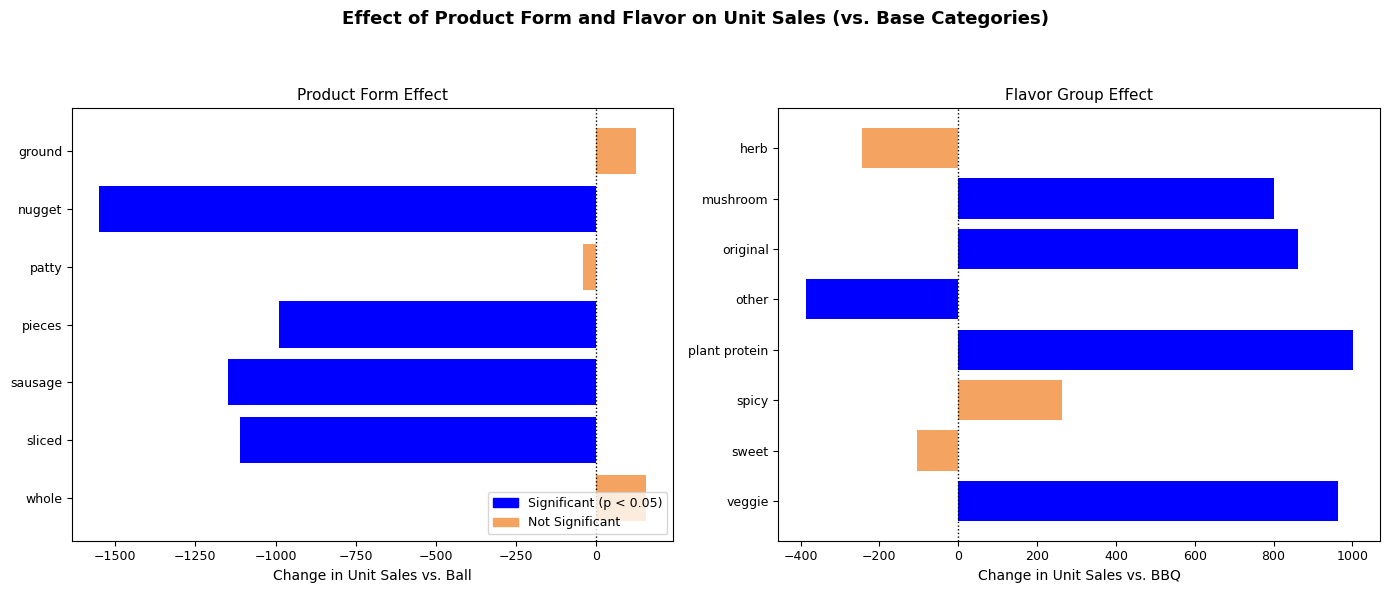

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Hardcoded data
form_data = {
    'label': ['ground', 'nugget', 'patty', 'pieces', 'sausage', 'sliced', 'whole'],
    'coef': [122.93, -1549.85, -40.30, -988.16, -1147.78, -1111.95, 155.46],
    'pval': [0.357, 0.000, 0.726, 0.000, 0.000, 0.000, 0.363]
}

flavor_data = {
    'label': ['herb', 'mushroom', 'original', 'other', 'plant protein', 'spicy', 'sweet', 'veggie'],
    'coef': [-243.60, 801.73, 862.09, -386.78, 1000.48, 262.69, -105.27, 963.36],
    'pval': [0.185, 0.000, 0.000, 0.011, 0.000, 0.076, 0.610, 0.000]
}

# Create DataFrames
form_df = pd.DataFrame(form_data)
form_df['significant'] = form_df['pval'] < 0.05

flavor_df = pd.DataFrame(flavor_data)
flavor_df['significant'] = flavor_df['pval'] < 0.05

# Reverse for top-down plotting
form_df = form_df.iloc[::-1].reset_index(drop=True)
flavor_df = flavor_df.iloc[::-1].reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
fig.suptitle("Effect of Product Form and Flavor on Unit Sales (vs. Base Categories)", fontsize=13, weight='bold')

# --- Product Form Effect ---
axes[0].barh(
    form_df['label'],
    form_df['coef'],
    color=form_df['significant'].map({True: 'blue', False: 'sandybrown'})
)
axes[0].set_title("Product Form Effect", fontsize=11)
axes[0].set_xlabel("Change in Unit Sales vs. Ball", fontsize=10)
axes[0].axvline(0, color='black', linewidth=1, linestyle='dotted')

# --- Flavor Group Effect ---
axes[1].barh(
    flavor_df['label'],
    flavor_df['coef'],
    color=flavor_df['significant'].map({True: 'blue', False: 'sandybrown'})
)
axes[1].set_title("Flavor Group Effect", fontsize=11)
axes[1].set_xlabel("Change in Unit Sales vs. BBQ", fontsize=10)
axes[1].axvline(0, color='black', linewidth=1, linestyle='dotted')

# Legend (manual handle)
from matplotlib.patches import Patch
legend_handles = [
    Patch(color='blue', label='Significant (p < 0.05)'),
    Patch(color='sandybrown', label='Not Significant')
]
axes[0].legend(handles=legend_handles, loc='lower right', fontsize=9)

# Clean layout
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


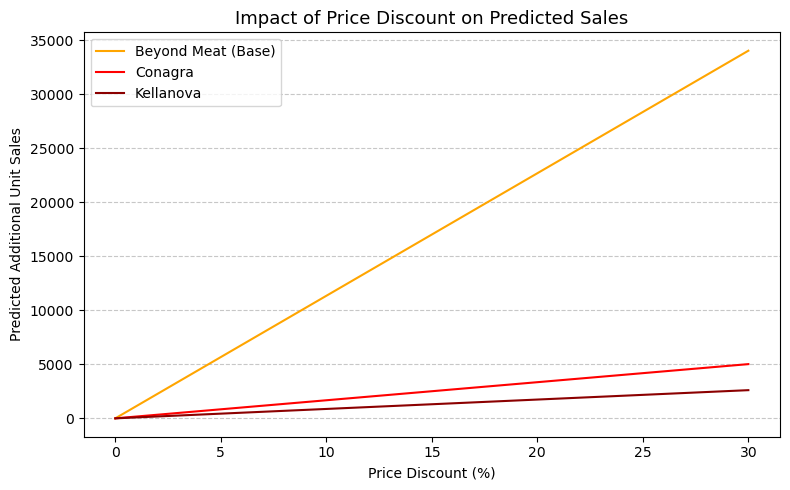

In [69]:
# Define discount range (0% to 30%)
discount_pct = np.linspace(0, 0.30, 100)

# Coefficients from regression output
base_effect = 113500
conagra_effect = base_effect - 96760
kellanova_effect = base_effect - 104800

# Calculate predicted additional sales
beyond_sales = base_effect * discount_pct
conagra_sales = conagra_effect * discount_pct
kellanova_sales = kellanova_effect * discount_pct

# Plotting
plt.figure(figsize=(8, 5), dpi=100)
plt.plot(discount_pct * 100, beyond_sales, label='Beyond Meat (Base)', color='orange')
plt.plot(discount_pct * 100, conagra_sales, label='Conagra', color='red')
plt.plot(discount_pct * 100, kellanova_sales, label='Kellanova', color='darkred')

plt.title("Impact of Price Discount on Predicted Sales", fontsize=13)
plt.xlabel("Price Discount (%)")
plt.ylabel("Predicted Additional Unit Sales")
plt.legend(frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


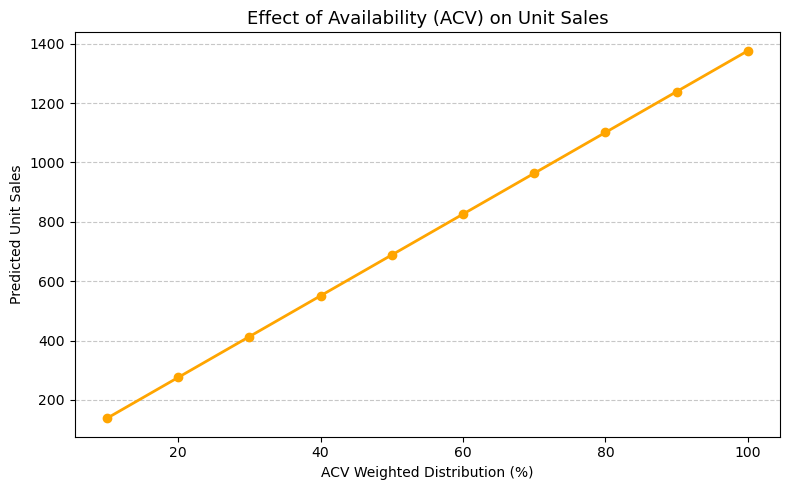

In [71]:
# Regression coefficient from output
acv_coef = 1376.6422

# ACV range: 10% to 100%
acv_pct = np.arange(10, 101, 10)
acv_values = acv_pct / 100

# Predicted unit sales
predicted_sales = acv_coef * acv_values

# Plot
plt.figure(figsize=(8, 5), dpi=100)
plt.plot(acv_pct, predicted_sales, color='orange', marker='o', linewidth=2)

plt.title("Effect of Availability (ACV) on Unit Sales", fontsize=13)
plt.xlabel("ACV Weighted Distribution (%)")
plt.ylabel("Predicted Unit Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = model.model.exog
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["variable"] = model.model.exog_names

print(vif.sort_values("VIF", ascending=False))

           VIF                                           variable
0   111.453344                                          Intercept
20   38.330562                            Q('Price_Discount_Pct')
24   35.053755  C(Q('Manufacturer Name'))[T.Rest_ALL]:Q('Price...
19    9.957733              C(Q('Manufacturer Name'))[T.Rest_ALL]
10    6.643724                      C(Flavor_Grouped)[T.original]
18    5.927658             C(Q('Manufacturer Name'))[T.KELLANOVA]
3     5.549290                           C(Form_Grouped)[T.patty]
16    4.925856        C(Q('Manufacturer Name'))[T.CONAGRA BRANDS]
21    4.433156  C(Q('Manufacturer Name'))[T.CONAGRA BRANDS]:Q(...
23    3.711077  C(Q('Manufacturer Name'))[T.KELLANOVA]:Q('Pric...
13    3.018803                         C(Flavor_Grouped)[T.spicy]
5     2.981245                         C(Form_Grouped)[T.sausage]
17    2.959915  C(Q('Manufacturer Name'))[T.IMPOSSIBLE FOODS INC]
4     2.884692                          C(Form_Grouped)[T.pieces]
11    2.87